In [1]:
import numpy as np
from matplotlib import pyplot as plt
from kuramoto import *

In [2]:
# Set up model parameters 
epsilon = 1
gamma = 0.4
sigma = 0.1
mean_omega = 0.5

# Set up simulation parameters 
L = 128 # size of the system ¯
T = 5e2 # total time of the simulation 
n_batches = T # number of time points recorded in the end 

A = np.random.rand(L, L)
A = (A + A.T)/2
np.fill_diagonal(A, 0) 


network_matrix = (A>0.97).astype('float')

print('number of points with branches')
print(np.sum(network_matrix, axis=0))


# Initialise the model and run the simulation 
model = KuramotoNetwork(epsilon, gamma, sigma, mean_omega, BC='fixed')
model.initialise(L, T, n_batches, network_matrix)
model.evolve() # this runs the simulation

number of points with branches
[0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 2. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0.]


100%|██████████████████████████████████████████████████████| 500/500 [00:14<00:00, 34.98it/s]


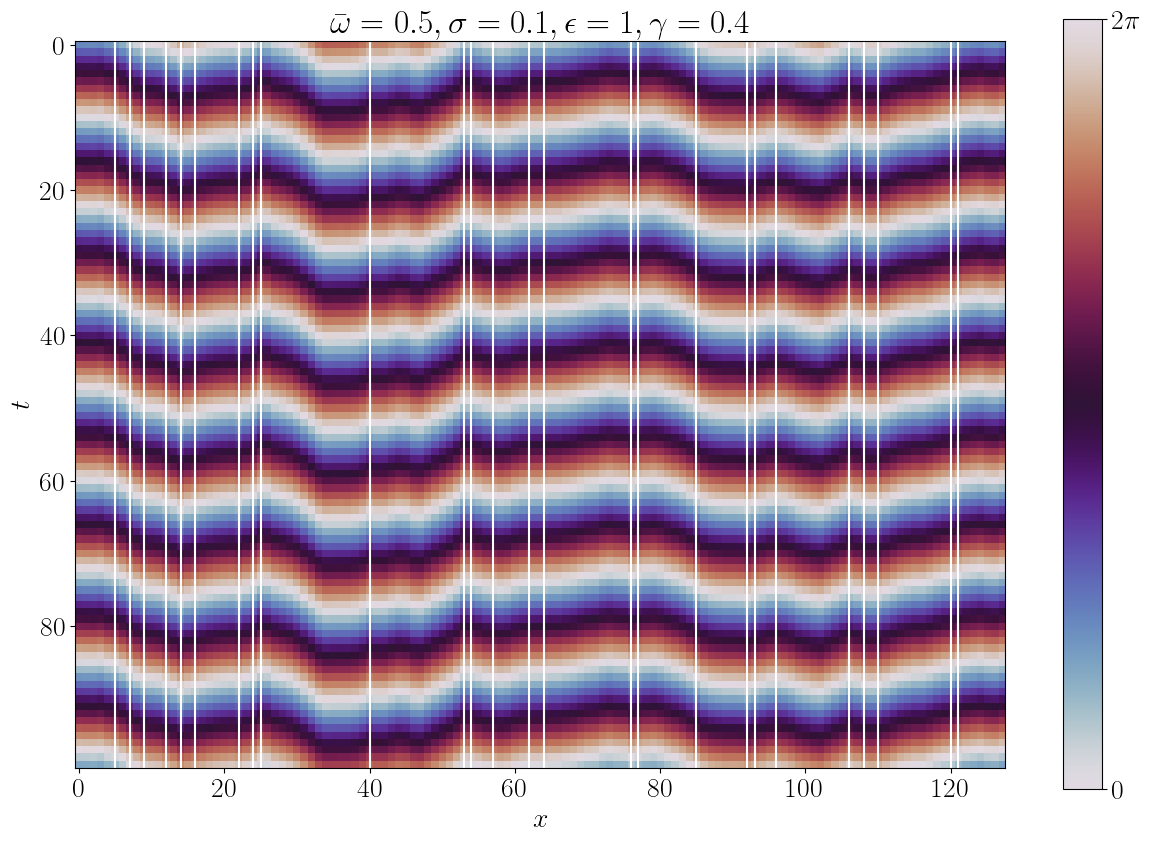

In [3]:
plt.figure(figsize=(15, 10))
plt.rc('font', size=20)
plt.rc('text', usetex=True)
im = plt.imshow(model.res[-100:] % (np.pi*2), cmap='twilight', vmin=0, vmax=2*np.pi)
cbar = plt.colorbar(im)
for (x, v) in enumerate(np.sum(network_matrix, axis=0)):
    if v > 0: # it's a branch point
        plt.axvline(x=x,color='white')
        
cbar.set_ticks([0, 2*np.pi])
cbar.set_ticklabels([r'$0$', r'$2\pi$'])
plt.title(r'$\bar{{\omega}}={}, \sigma={}, \epsilon ={}, \gamma ={}$'.format(mean_omega, sigma, epsilon, gamma))
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.show() 